<a href="https://colab.research.google.com/github/Ank1taS/Ybi_foundation_task/blob/main/bank_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank customer churn prediction


## objective:
Identifing and visualizing major factors causing customer churn and to predict if customer will churn or not(Binary classification)


## Data source
Kaggle


### Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###Import Data

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ank1tas","key":"95948b2ecfb0c6bf41e632ec09fa10ae"}'}

In [3]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn

# ! kaggle datasets download radheshyamkollipara/bank-customer-churn

# https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers?select=Churn_Modelling.csv
!kaggle datasets download adammaus/predicting-churn-for-bank-customers


  0% 0.00/262k [00:00<?, ?B/s]
100% 262k/262k [00:00<00:00, 81.0MB/s]


In [5]:
# !unzip /content/bank-customer-churn.zip -d /content/
!unzip /content/predicting-churn-for-bank-customers.zip -d /content/



Archive:  /content/predicting-churn-for-bank-customers.zip
  inflating: /content/Churn_Modelling.csv  


In [6]:
# data_frame = pd.read_csv('/content/Customer-Churn-Records.csv')
data_frame = pd.read_csv('/content/Churn_Modelling.csv')


###Describe Data

In [7]:
data_frame.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [8]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
data_frame['CustomerId']

0       15634602
1       15647311
2       15619304
3       15701354
4       15737888
          ...   
9995    15606229
9996    15569892
9997    15584532
9998    15682355
9999    15628319
Name: CustomerId, Length: 10000, dtype: int64

In [10]:
data_frame.index

RangeIndex(start=0, stop=10000, step=1)

In [11]:
data_frame = data_frame.set_index('CustomerId')

In [12]:
data_frame.index

Int64Index([15634602, 15647311, 15619304, 15701354, 15737888, 15574012,
            15592531, 15656148, 15792365, 15592389,
            ...
            15798964, 15769959, 15657105, 15569266, 15719294, 15606229,
            15569892, 15584532, 15682355, 15628319],
           dtype='int64', name='CustomerId', length=10000)

In [13]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


### Encoding


In [14]:
data_frame['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

###Data Visualization

In [15]:
data_frame.replace({'Geography': {'France':2, 'Germany':1, 'Spain':0}}, inplace=True)

In [16]:
data_frame['Geography'].value_counts()

2    5014
1    2509
0    2477
Name: Geography, dtype: int64

In [17]:
data_frame['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [19]:
data_frame.replace({'Gender': {'Male': 0, 'Female':1}}, inplace=True)

In [20]:
data_frame['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [22]:
data_frame.replace({'NumOfProducts': {1:0, 2:1, 3:1, 4:1}}, inplace=True)
data_frame['NumOfProducts'].value_counts()

0    5084
1    4916
Name: NumOfProducts, dtype: int64

In [23]:
data_frame['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [24]:
data_frame['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

### Feature Engineering

In [26]:
# .loc[]: This is a method for selecting data from a DataFrame using labels or boolean indexing.
data_frame.loc[(data_frame['Balance'] == 0), 'Exited'].value_counts()
# data_frame['']

0    3117
1     500
Name: Exited, dtype: int64

<Axes: >

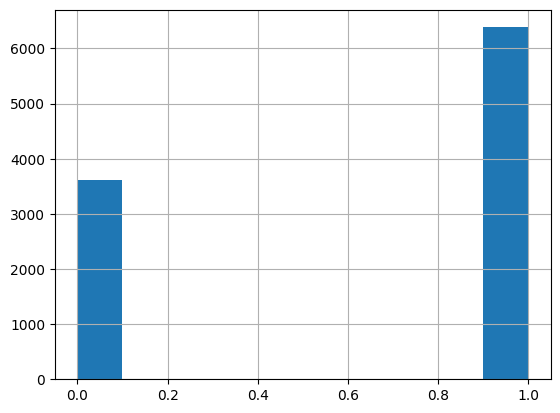

In [27]:
data_frame['ZeroBalance'] = np.where(data_frame['Balance'] > 0, 1, 0)
data_frame['ZeroBalance'].hist()

In [29]:
# get data regarding churn count/ customer based in geographical area
data_frame.groupby(['Exited', 'Geography']).count()

RowNumber  Surname  CreditScore  Gender   Age  Tenure  \
Exited Geography                                                          
0      0               2064     2064         2064    2064  2064    2064   
       1               1695     1695         1695    1695  1695    1695   
       2               4204     4204         4204    4204  4204    4204   
1      0                413      413          413     413   413     413   
       1                814      814          814     814   814     814   
       2                810      810          810     810   810     810   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
Exited Geography                                                      
0      0             2064           2064       2064            2064   
       1             1695           1695       1695            1695   
       2             4204           4204       4204            4204   
1      0              413            413        413             413   
       1              814            814        814             814   
       2              810            810        810             810   

                  EstimatedSalary  ZeroBalance  
Exited Geography                                
0      0                     2064         2064  
       1                     1695         1695  
       2                     4204         4204  
1      0                      413          413  
       1                      814          814  
       2                      810          810

###Data Preprocessing

In [34]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  int64  
 4   Gender           10000 non-null  int64  
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
 13  ZeroBalance      10000 non-null  int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 1.1+ MB


In [36]:
data_frame = data_frame.drop('RowNumber', axis=1)
data_frame.info()

KeyError: ignored

###Define Target Variable (y) and Feature Variables (X)

In [37]:
data_frame.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'ZeroBalance'],
      dtype='object')

In [38]:
X = data_frame.drop(['Surname', 'Exited'], axis=1)

In [39]:
y = data_frame['Exited']

In [42]:
print(X.shape)
print(y.shape)

(10000, 11)
(10000,)


###Dataset
Random under sampling and random over sampling

###Train Test Split

##Modeling

###Model Evaluation

###Prediction

###Accuracy

### Explaination / conclusion